In [2]:
import pandas as pd 
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('./data/House_Rent_Dataset.csv')

In [4]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [6]:
df.head()

,posted_on,bhk,rent,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [7]:
df.posted_on = pd.to_datetime(df.posted_on)

In [8]:
df['posted_month'] = df.posted_on.dt.month_name()

In [9]:
df.posted_month.value_counts()

June     1859
May      1681
July      978
April     228
Name: posted_month, dtype: int64

<AxesSubplot:xlabel='posted_month'>

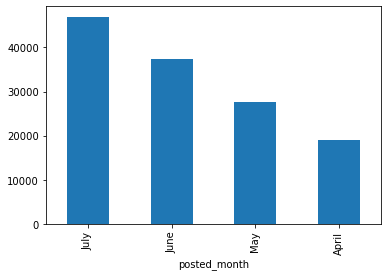

In [10]:
df.groupby('posted_month')['rent'].mean().sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot:xlabel='tenant_preferred'>

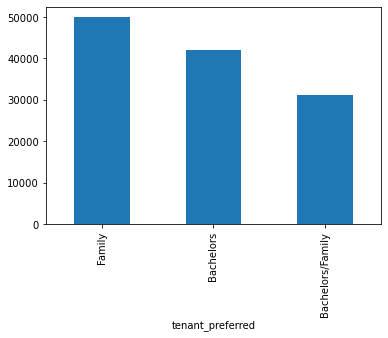

In [11]:
df.groupby('tenant_preferred')['rent'].mean().sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot:xlabel='city'>

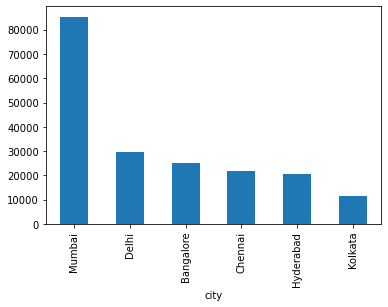

In [12]:
df.groupby('city')['rent'].mean().sort_values(ascending = False).plot(kind = 'bar')

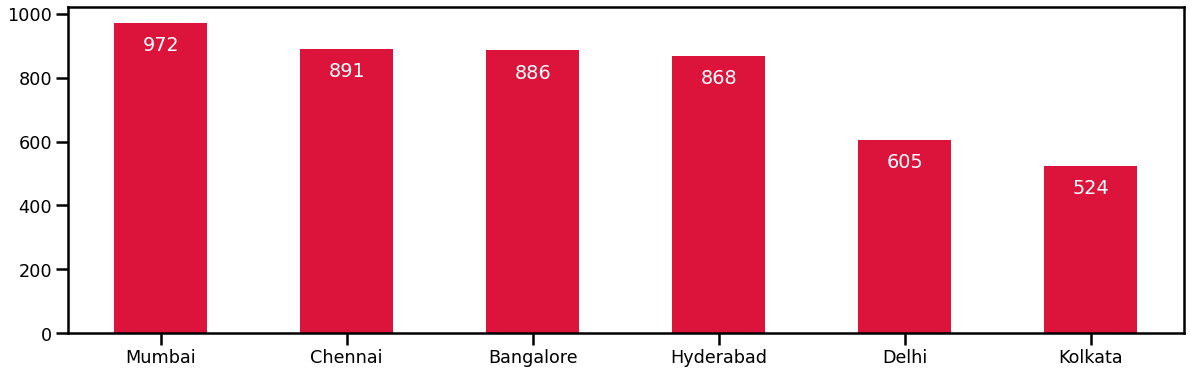

In [19]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = df["city"].value_counts().plot(kind = 'bar',
                                         color = "crimson",
                                         rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100), ha = 'center', va = 'bottom', color = 'white')

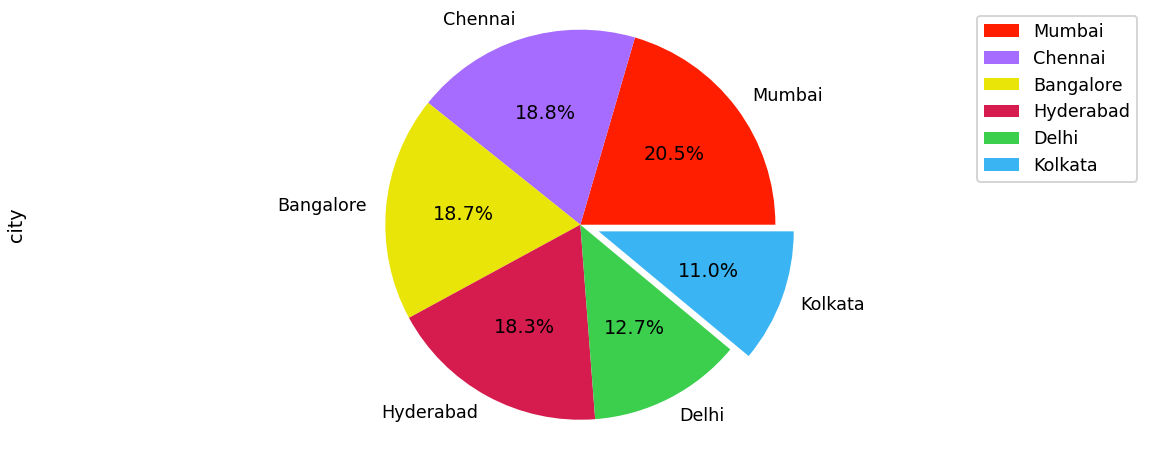

In [40]:
plt.figure(figsize = (20, 8))

counts = df.city.value_counts()
explode = (0, 0, 0, 0, 0, 0.1)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']

counts.plot(kind = 'pie', colors = colors, explode = explode, autopct = '%1.1f%%')

plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

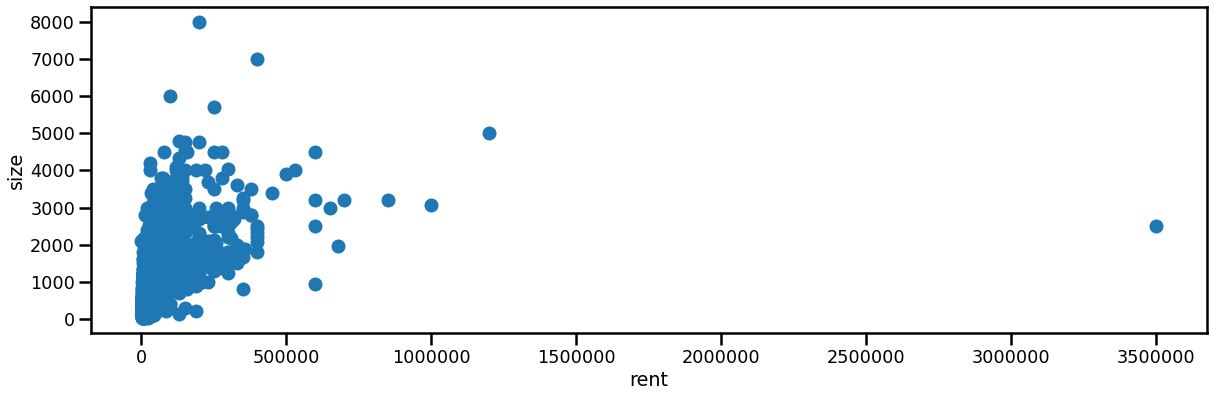

In [45]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
plt.scatter(df["rent"], df["size"])
plt.xlabel("rent")
plt.ylabel("size");

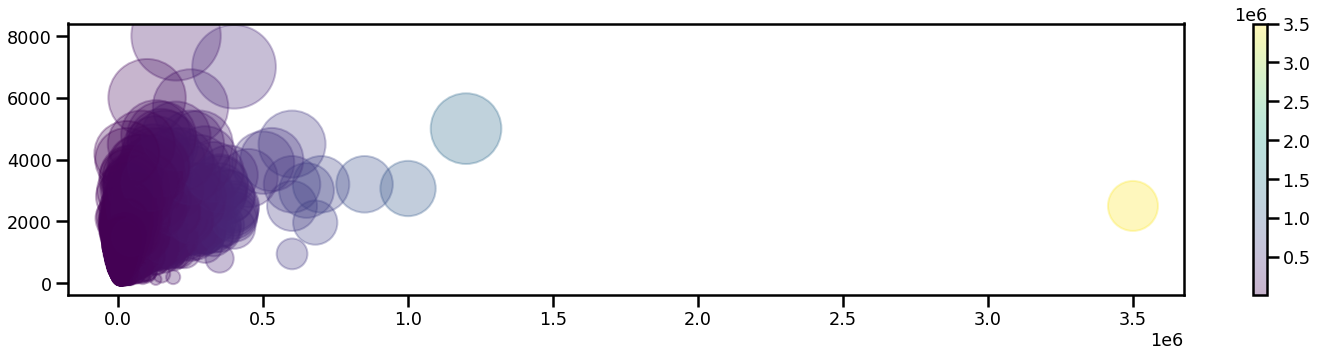

In [55]:
x = df.rent
y = df['size']
color = df.rent
s = df['size']

plt.figure(figsize = (25, 5))

plt.scatter(x, y, c = color, s = s, alpha=0.3, cmap = 'viridis')
plt.colorbar();


In [59]:
df.groupby('city')['area_locality'].count().sort_values()

city
Kolkata      524
Delhi        605
Hyderabad    868
Bangalore    886
Chennai      891
Mumbai       972
Name: area_locality, dtype: int64

<AxesSubplot:xlabel='rent', ylabel='size'>

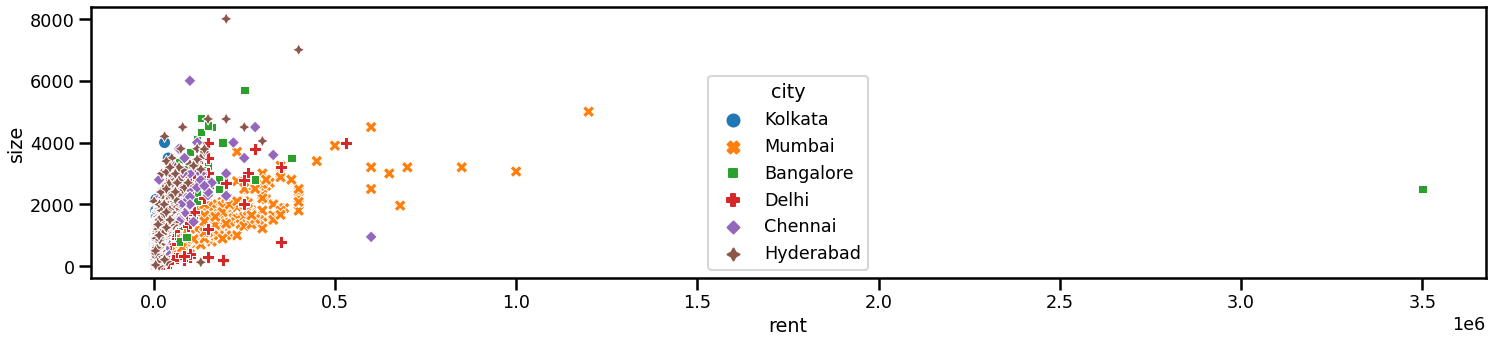

In [77]:
plt.figure(figsize = (25, 5))
sns.scatterplot(x='rent', y='size', data=df, hue='city', style='city')

In [78]:
df.groupby

,posted_on,bhk,rent,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,posted_month
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,May
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,May
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,May
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,July
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,May


In [ ]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = df.groupby('furnishing_status')['rent'].mean().plot(kind = 'bar',
                                         color = "crimson",
                                         rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100), ha = 'center', va = 'bottom', color = 'white')